<a href="https://colab.research.google.com/github/wcaine93/DS-ML-Project/blob/main/src/model-training-and-evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code

In [35]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
# feature imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [62]:
# model imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [16]:
# place data in dataframe
df = pd.read_csv('data/clean_data.csv')

## Feature Rearrangement Selection

### Feature Selection

In [25]:
# extract features (70/30 split)
X = df.iloc[:, 2:6]
y = df['Overdrawn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

I will use features `Gender_Male`, `Gender_Female`, `Age`, `DaysDrink` and label `Overdrawn`.

| Gender_Male | Gender_Female | Age | DaysDrink | Overdrawn |
|:-:|:-:|:-:|:-:|:-:|
| `int64` | `int64` | `int64` | `category` | `int64` |
| `0 or 1` | `0 or 1` | `> 0` | `'None', 'Low', 'Moderate' or 'High'` | `0 or 1` |

### Feature Rearrangement

I will scale the `Age` data because it is discrete numerical data. I will leave `Gender_Male`, `Gender_Female`, alone because they are binary data. I will encode `DaysDrink` because it is categorical data.

In [184]:
# scale Age data
scaler = MinMaxScaler()
X_train[['Age']] = scaler.fit_transform(X_train[['Age']])
X_test[['Age']] = scaler.transform(X_test[['Age']])

# note: you have to use two brackets [[]] to do a single column
# because it's like doing df[df[column] == 0] where it pulls from axis=0 instead of axis=1

In [175]:
# encode DaysDrink data
encoder = LabelEncoder()
X_train['DaysDrink'] = encoder.fit_transform(X_train['DaysDrink'])
X_test['DaysDrink'] = encoder.transform(X_test['DaysDrink'])

## Model Training

We will train 5 types of models to classify this data:

1. Logistic Regression
2. k-Nearest Neighbors
3. Decision Tree Algorithm
4. Random Forest
5. SVM

I have implemented regularization techniques where appropriate.

### Logistic Regression

In [214]:
# train model
logistic_model = LogisticRegression(penalty='l2', C=0.1)
logistic_model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [215]:
# test the model
y_pred = logistic_model.predict(X_test)

In [216]:
# compute accuracy
logistic_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(logistic_accuracy * 100))

Accuracy: 84.73%


In [217]:
# compute f1 score
logistic_f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}%".format(logistic_f1 * 100))

F1 Score: 0.00%


Text(0.5, 1.0, 'Confusion Matrix')

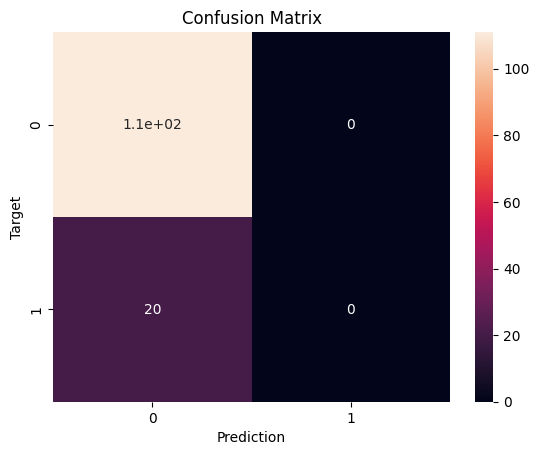

In [218]:
# generate confusion matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

### k-Nearest Neighbors

In [151]:
# train model
kNN_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
kNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [152]:
# test the model
y_pred = kNN_model.predict(X_test)

In [153]:
# compute accuracy
kNN_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(kNN_accuracy * 100))

Accuracy: 81.68%


In [154]:
# compute f1 score
kNN_f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}%".format(kNN_f1 * 100))

F1 Score: 7.69%


Text(0.5, 1.0, 'Confusion Matrix')

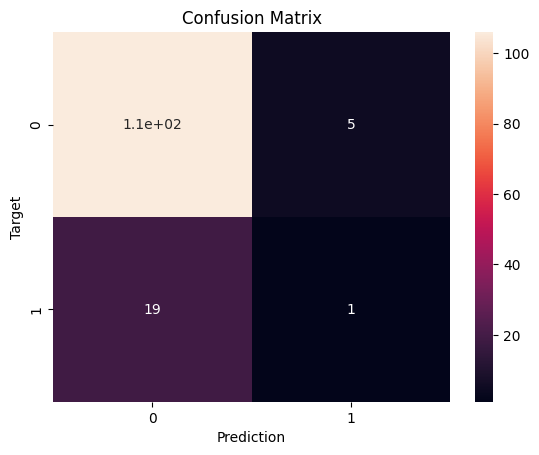

In [155]:
# generate confusion matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

### Decision Tree

In [198]:
# train the model
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)
DT_model .fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [199]:
# test the model
y_pred = DT_model .predict(X_test)

In [200]:
# compute accuracy
DT_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(DT_accuracy * 100))

Accuracy: 85.50%


In [201]:
# compute f1 score
DT_f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}%".format(DT_f1 * 100))

F1 Score: 9.52%


Text(0.5, 1.0, 'Confusion Matrix')

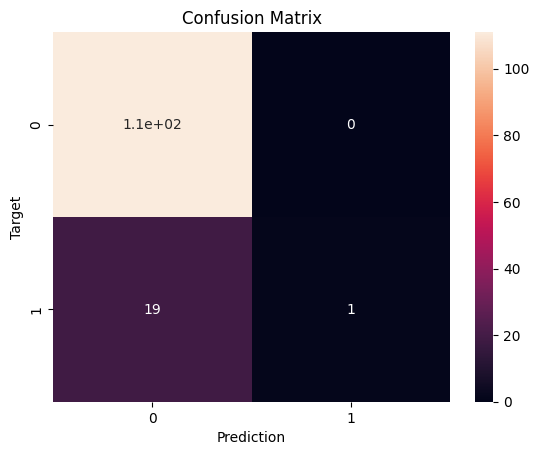

In [202]:
# generate confusion matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

### Random Forest

In [161]:
# train the model
forest_model = RandomForestClassifier(n_estimators= 10, criterion="entropy")
forest_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [162]:
# test the model
y_pred = forest_model.predict(X_test)

In [163]:
# compute accuracy
forest_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(forest_accuracy * 100))

Accuracy: 83.21%


In [164]:
# compute f1 score
forest_f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}%".format(forest_f1 * 100))

F1 Score: 0.00%


Text(0.5, 1.0, 'Confusion Matrix')

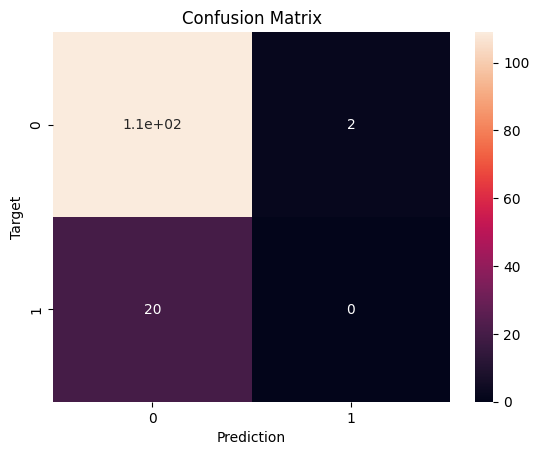

In [165]:
# generate confusion matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

### SVM

In [268]:
# train the model
SVM_model = SVC(kernel='linear', random_state=0, C=.1)
SVM_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=0)

In [269]:
# test the model
y_pred = SVM_model.predict(X_test)

In [270]:
# compute accuracy
SVM_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(SVM_accuracy * 100))

Accuracy: 84.73%


In [271]:
# compute f1 score
SVM_f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}%".format(SVM_f1 * 100))

F1 Score: 0.00%


Text(0.5, 1.0, 'Confusion Matrix')

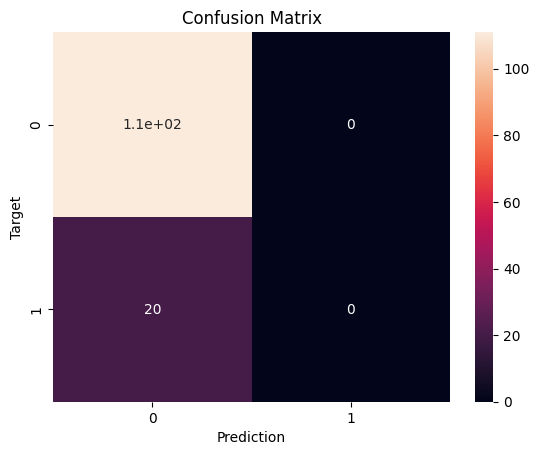

In [272]:
# generate confusion matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

## Model Comparison

In [185]:
print(len(df[df['Overdrawn'] == 1]))
print(len(df[df['Overdrawn'] == 0]))

57
378


The target data is imbalanced (13.1% No output, 86.9% Yes output), meaning that accuracy is not a good metric for evaluating the effectiveness of the models. For this reason, we have calculated F1 score for each of the models as well, and we will use this to decide on which model is best.

In [275]:
stats = {
    'accuracies': [logistic_accuracy, kNN_accuracy, DT_accuracy, forest_accuracy, SVM_accuracy],
    'f1_scores': [logistic_f1, kNN_f1, DT_f1, forest_f1, SVM_f1]
}
stats_df = pd.DataFrame(stats, index=['Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'SVM'])

print(stats_df)

                     accuracies  f1_scores
Logistic Regression    0.847328   0.000000
k-Nearest Neighbors    0.816794   0.076923
Decision Tree          0.854962   0.095238
Random Forest          0.832061   0.000000
SVM                    0.847328   0.000000


The model with both the highest f1 score and accuracy was the Decision Tree Model. For this reason, we conclude that the Decision Tree Model is the best fit for this data set.